In [26]:
import os
print(os.getcwd())

/Users/turkanmurdun/CE49X-Spring25/labs/lab5


In [28]:
import os
os.path.exists('../../datasets/concrete_strength/Concrete_Data.xls')

False

 First 5 rows:

{'Cement': 540.0, 'Blast Furnace Slag': 0.0, 'Fly Ash': 0.0, 'Water': 162.0, 'Superplasticizer': 2.5, 'Coarse Aggregate': 1040.0, 'Fine Aggregate': 676.0, 'Age': 28.0, 'Concrete compressive strength': 79.98611076}
{'Cement': 540.0, 'Blast Furnace Slag': 0.0, 'Fly Ash': 0.0, 'Water': 162.0, 'Superplasticizer': 2.5, 'Coarse Aggregate': 1055.0, 'Fine Aggregate': 676.0, 'Age': 28.0, 'Concrete compressive strength': 61.887365759999994}
{'Cement': 332.5, 'Blast Furnace Slag': 142.5, 'Fly Ash': 0.0, 'Water': 228.0, 'Superplasticizer': 0.0, 'Coarse Aggregate': 932.0, 'Fine Aggregate': 594.0, 'Age': 270.0, 'Concrete compressive strength': 40.269535256000005}
{'Cement': 332.5, 'Blast Furnace Slag': 142.5, 'Fly Ash': 0.0, 'Water': 228.0, 'Superplasticizer': 0.0, 'Coarse Aggregate': 932.0, 'Fine Aggregate': 594.0, 'Age': 365.0, 'Concrete compressive strength': 41.052779992}
{'Cement': 198.6, 'Blast Furnace Slag': 132.4, 'Fly Ash': 0.0, 'Water': 192.0, 'Superplasticizer': 0.0, 'Coar

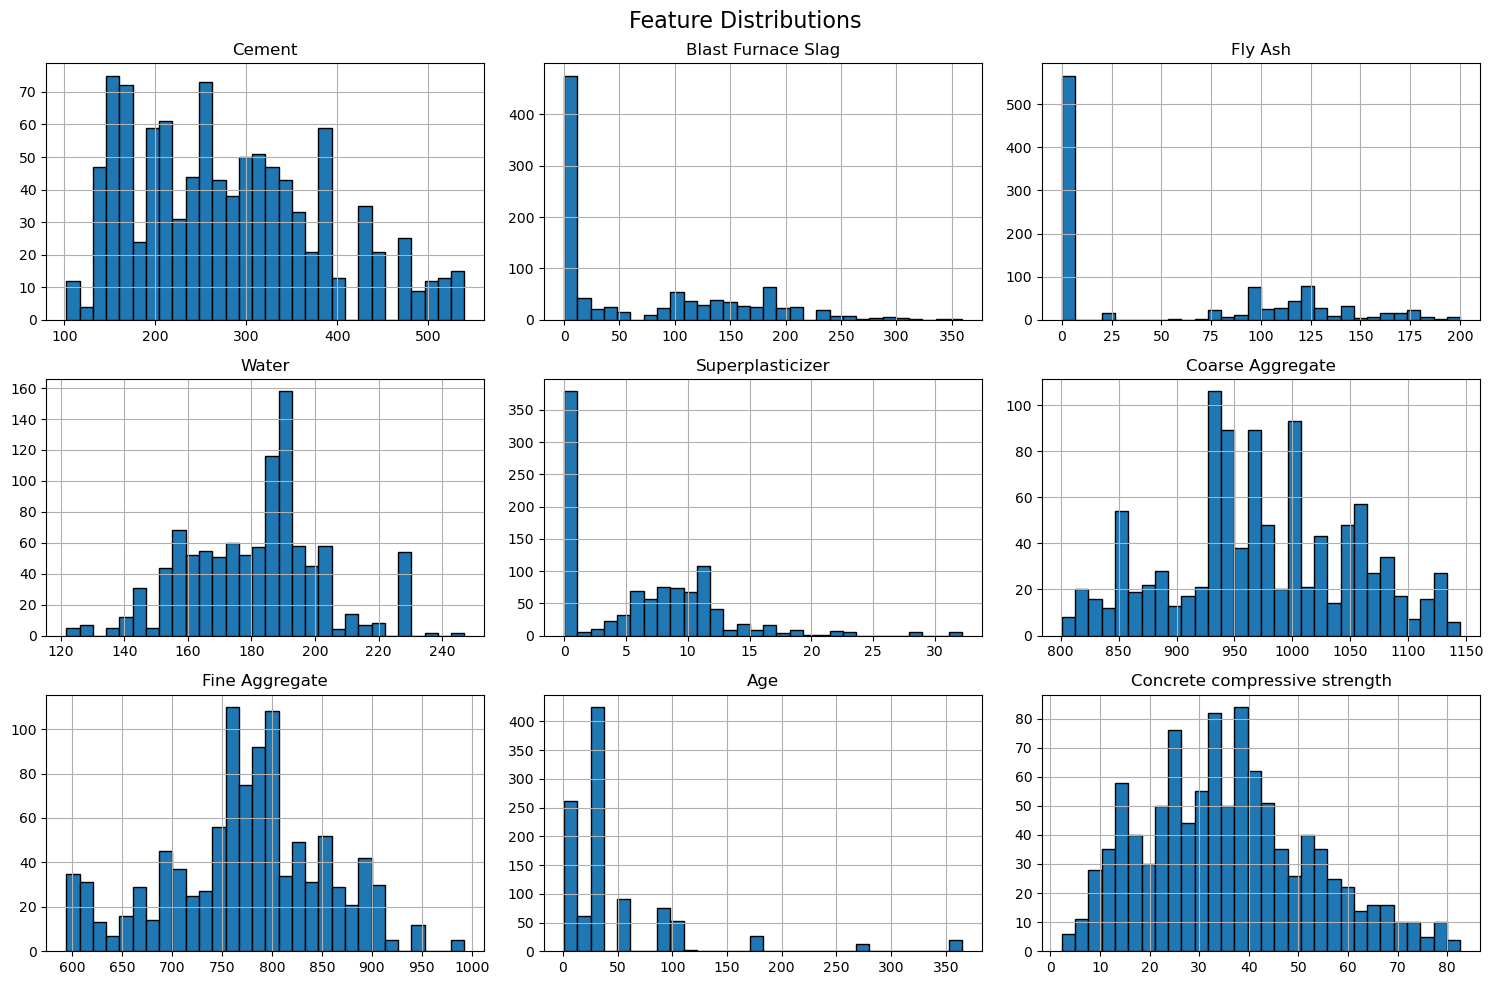


 Data preprocessing complete!
Training set shape: (824, 8)
Testing set shape: (206, 8)

 Model Evaluation Results:
Mean Squared Error (MSE): 98.14
R² Score: 0.64


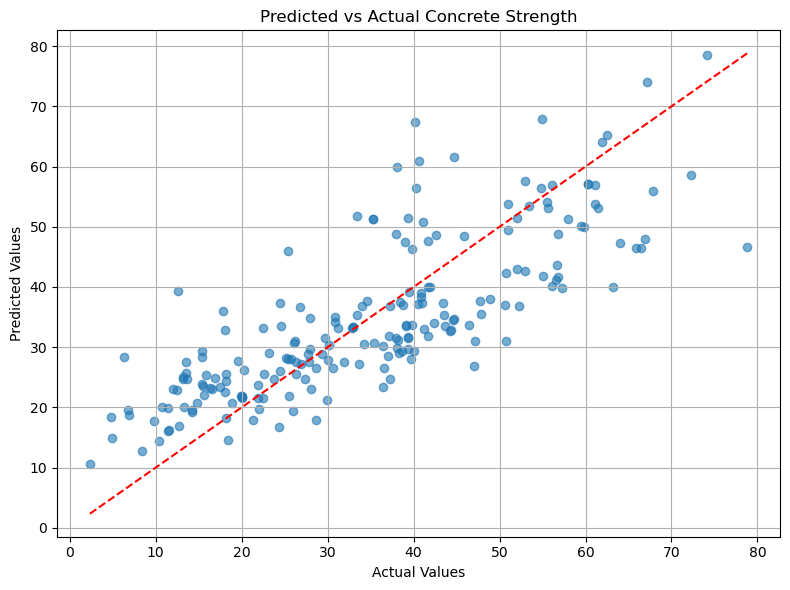

In [46]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
def load_data():
    try:
        df = pd.read_excel('/Users/turkanmurdun/Desktop/CE49X-Spring25/datasets/concrete_strength/Concrete_Data.xls')
        return df
    except FileNotFoundError:
        print("Dataset file not found.")
        return

# EDA: Preview and basic statistics
def exploratory_data_analysis(data):
    print(" First 5 rows:\n")
    for i in range(5):
        print(data.iloc[i].to_dict())

    print("\n Summary Statistics:\n")
    print(data.describe())

    print("\n Missing Values:\n")
    print(data.isnull().sum())

# Plot histograms
def plot_histograms(data):
    data.hist(bins=30, figsize=(15, 10), edgecolor='black')
    plt.suptitle("Feature Distributions", fontsize=16)
    plt.tight_layout()
    plt.savefig("feature_distributions.png", dpi=300, bbox_inches="tight")
    plt.show()

# Drop missing values (if any)
def remove_missing_values(data):
    return data.dropna()

# Simplify column names (remove spaces and parentheses)
def simplify_column_names(data):
    data.columns = [name.strip().split('(')[0].strip() for name in data.columns]
    return data

# Separate features and scale them
def prepare_features(data):
    X = data.drop('Concrete compressive strength', axis=1)
    y = data['Concrete compressive strength']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

# Split into training and testing sets
def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=50)

# Main workflow
data = load_data()

if data is not None:
    data = remove_missing_values(data)
    data = simplify_column_names(data)

    exploratory_data_analysis(data)
    plot_histograms(data)

    X_scaled, y = prepare_features(data)
    X_train, X_test, y_train, y_test = split_data(X_scaled, y)

    print("\n Data preprocessing complete!")
    print(f"Training set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n Model Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Concrete Strength")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.savefig("predicted_vs_actual.png", dpi=300, bbox_inches="tight")
plt.show()

In [42]:
!pip install xlrd